In [37]:
# pip install -i https://pypi.tuna.tsinghua.edu.cn/simple lib-pybroker
!pip install -i https://pypi.tuna.tsinghua.edu.cn/simple seaborn


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [1]:
import pybroker
from pybroker import Strategy,StrategyConfig,YFinance
pybroker.enable_data_source_cache('my_strategy')

In [2]:
config=StrategyConfig(initial_cash=500_000)
strategy=Strategy(YFinance(),"3/1/2017","3/1/2022",config)

In [3]:
from pybroker import ExecContext
def buy_low(ctx:ExecContext):
    if ctx.long_pos():
        return;
    if ctx.bars>2 and ctx.close[-1]<ctx.low[-2]:
        ctx.buy_shares=ctx.calc_target_shares(0.25)
        ctx.buy_limit_price=ctx.close[-1]-0.01
        ctx.hold_bars=3

In [4]:
def short_high(ctx:ExecContext):
    if ctx.short_pos():
        return
    if ctx.bars>2 and ctx.close[-1]>ctx.high[-2]:
        ctx.sell_shares=100
        ctx.hold_bars=2

In [5]:
strategy.add_execution(buy_low,["AAPL","MSFT"])

In [6]:
strategy.add_execution(short_high,["TSLA"])

In [7]:
result=strategy.backtest()

Backtesting: 2017-03-01 00:00:00 to 2022-03-01 00:00:00

Loaded cached bar data.

Test split: 2017-03-01 00:00:00 to 2022-02-28 00:00:00


  0% (0 of 1259) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  5% (71 of 1259) |#                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 15% (201 of 1259) |###                  | Elapsed Time: 0:00:00 ETA:   0:00:00
 25% (321 of 1259) |#####                | Elapsed Time: 0:00:00 ETA:   0:00:00
 35% (451 of 1259) |#######              | Elapsed Time: 0:00:00 ETA:   0:00:00
 40% (511 of 1259) |########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 50% (631 of 1259) |##########           | Elapsed Time: 0:00:00 ETA:   0:00:00
 58% (741 of 1259) |############         | Elapsed Time: 0:00:00 ETA:   0:00:00
 67% (851 of 1259) |##############       | Elapsed Time: 0:00:00 ETA:   0:00:00
 76% (961 of 1259) |################     | Elapsed Time: 0:00:00 ETA:   0:00:00
 86% (1091 of 1259) |#################   | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (1141 of 1259) |##################  | Elapsed Time: 0:00:00 ETA:   0:00:00
 99% (1251 of 1259) |###################


Finished backtest: 0:00:05


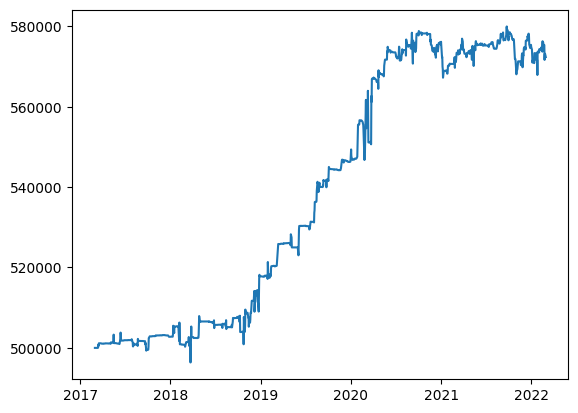

In [8]:
import matplotlib.pyplot as plt

chart = plt.subplot2grid((3, 2), (0, 0), rowspan=3, colspan=2)
chart.plot(result.portfolio.index, result.portfolio['market_value'])


In [ ]:
import plot_utils
df=plot_utils.plotResult(result)
result_dict = df.set_index('zh_name')['value'].to_dict()
# 打印结果
print(result_dict)

{'交易次数': 303.0, '初始市值': 500000.0, '期末市值': 572353.3, '总盈亏': 73174.63, '未实现盈亏': -821.3299999999581, '总回报率': 14.634926000000004, '总盈利': 176908.36, '总亏损': -103733.72999999998, '总手续费': 0.0, '最大回撤（现金）': -13308.050000000047, '最大回撤（百分比）': -2.3597218205536397, '胜率': 51.48514851485149, '亏损率': 48.51485148514851, '盈利交易次数': 156.0, '亏损交易次数': 147.0, '每笔交易平均盈亏': 241.5004290429043, '每笔交易平均回报率': 0.14877887788778876, '每笔交易平均K线数': 2.2508250825082508, '每笔交易平均盈利': 1134.0279487179487, '每笔交易平均盈利率': 3.1817307692307697, '盈利交易的平均K线数': 2.301282051282051, '每笔交易平均亏损': -705.6716326530611, '每笔交易平均亏损率': -3.069863945578231, '亏损交易的平均K线数': 2.197278911564626, '最大盈利交易': 16007.88, '最大盈利交易（百分比）': 11.69, '最大盈利交易的K线数': 3.0, '最大亏损交易': -7258.92, '最大亏损交易（百分比）': -5.34, '最大亏损交易的K线数': 3.0, '最大连续盈利交易次数': 8.0, '最大连续亏损交易次数': 9.0, '夏普比率': 0.049014391127464155, '索提诺比率': 0.05266762544397321, '盈亏比': 1.2822060415002987, '溃疡指数': 0.39737356712589106, '溃疡表现指数': 0.027624592839677206, '净值R²': 0.909570628892442, '标准误差': 31112.23335281851}


In [10]:
result_dict

{'交易次数': 303.0,
 '初始市值': 500000.0,
 '期末市值': 572353.3,
 '总盈亏': 73174.63,
 '未实现盈亏': -821.3299999999581,
 '总回报率': 14.634926000000004,
 '总盈利': 176908.36,
 '总亏损': -103733.72999999998,
 '总手续费': 0.0,
 '最大回撤（现金）': -13308.050000000047,
 '最大回撤（百分比）': -2.3597218205536397,
 '胜率': 51.48514851485149,
 '亏损率': 48.51485148514851,
 '盈利交易次数': 156.0,
 '亏损交易次数': 147.0,
 '每笔交易平均盈亏': 241.5004290429043,
 '每笔交易平均回报率': 0.14877887788778876,
 '每笔交易平均K线数': 2.2508250825082508,
 '每笔交易平均盈利': 1134.0279487179487,
 '每笔交易平均盈利率': 3.1817307692307697,
 '盈利交易的平均K线数': 2.301282051282051,
 '每笔交易平均亏损': -705.6716326530611,
 '每笔交易平均亏损率': -3.069863945578231,
 '亏损交易的平均K线数': 2.197278911564626,
 '最大盈利交易': 16007.88,
 '最大盈利交易（百分比）': 11.69,
 '最大盈利交易的K线数': 3.0,
 '最大亏损交易': -7258.92,
 '最大亏损交易（百分比）': -5.34,
 '最大亏损交易的K线数': 3.0,
 '最大连续盈利交易次数': 8.0,
 '最大连续亏损交易次数': 9.0,
 '夏普比率': 0.049014391127464155,
 '索提诺比率': 0.05266762544397321,
 '盈亏比': 1.2822060415002987,
 '溃疡指数': 0.39737356712589106,
 '溃疡表现指数': 0.027624592839677206,
 '净值R²': 0.90957062889244